# Python imports, GDrive and working paths

In [ ]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import shutil

from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Mount Google Drive
drive.mount('gdrive')

# Resources
cuda10_installer = "/content/gdrive/MyDrive/ACS/resources/cuda-repo-local-10.deb"

# Script directory
dga_script_dir = "/content/gdrive/MyDrive/ACS/dga-mixed-embeddings-ensemble/Code"

# Reports directory
reports_dir = "/content/gdrive/MyDrive/ACS/reports"

Mounted at gdrive


# Python 3.7

In [ ]:
!sudo apt-get install python3.7
!sudo apt-get update -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,530 kB of archives.
After this operation, 23.3 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-minimal amd64 3.7.16-1+focal1 [588 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-minimal amd64 3.7.16-1+focal1 [1,808 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-stdlib amd64 3.7.16-1+focal1 [1,773 kB]
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7 amd64 3.

In [ ]:
!python --version

Python 3.7.16


In [ ]:
!sudo apt install python3.7-distutils
!sudo apt install python3-pip
!python -m pip install --upgrade --force-reinstall pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3.7-lib2to3
The following NEW packages will be installed:
  python3.7-distutils python3.7-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 309 kB of archives.
After this operation, 1,229 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-lib2to3 all 3.7.16-1+focal1 [122 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-distutils all 3.7.16-1+focal1 [187 kB]
Fetched 309 kB in 1s (332 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debc

# Softwar requirements 

In [ ]:
!pip install -q -r "/content/gdrive/MyDrive/ACS/dga-mixed-embeddings-ensemble/requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.0/411.0 MB 937.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Cuda 10.0 installation

In [ ]:
# Install CUDA 10.0 (required for tf-gpu 1.15)
# Copy CUDA 10.0 installer from Google Drive to Colab
!cp "$cuda10_installer" cuda.deb

# Install CUDA 10.0
!apt-get update
!dpkg -i cuda.deb
!apt-key add /var/cuda-repo-10-0-local-10.0.130-410.48/7fa2af80.pub

# Update apt-get again
!apt-get update

# Install CUDA 10.0
!apt-get -y install cuda-10.0

# Set the PATH and LD_LIBRARY_PATH environment variables
os.environ['PATH'] += ':/usr/local/cuda/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda/lib64'

# Check if CUDA is installed successfully
!nvcc --version

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Selecting previously unselected package cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48.
(Reading database ... 123668 files and directories currently installed.)
Preparing to unpack cuda.deb ...
Unpa

In [ ]:
# Change directory to the specified path and extract the cudnn archive
%cd /content/gdrive/MyDrive/ACS/resources/
!tar -xvf cudnn-10.0-linux-x64-v7.6.5.32.tgz

# Copy cudnn.h file to the destination folder
!cp cuda/include/cudnn.h /usr/lib64-nvidia

# Copy libcudnn* files to the destination folder while preserving symbolic links
!cp -P cuda/lib64/libcudnn* /usr/lib64-nvidia

# Set read permissions for the copied cudnn files
!chmod a+r /usr/lib64-nvidia/cudnn*.h /usr/lib64-nvidia/libcudnn*

# Checks
# Change directory to /usr/lib64-nvidia
%cd /usr/lib64-nvidia

# List the files starting with "libcudnn" 
%ls -lha libcudnn*

/content/gdrive/MyDrive/ACS/resources
tar: cudnn-10.0-linux-x64-v7.6.5.32.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
/usr/lib64-nvidia
lrwxrwxrwx 1 root root   13 May 26 08:40 libcudnn.so -> libcudnn.so.7
lrwxrwxrwx 1 root root   17 May 26 08:40 libcudnn.so.7 -> libcudnn.so.7.6.5
-rw-r--r-- 1 root root 374M May 26 08:40 libcudnn.so.7.6.5
-rw-r--r-- 1 root root 373M May 26 08:40 libcudnn_static.a


# DGA classification network

In [ ]:
os.chdir(dga_script_dir)

### Dataset UMUDGA 1K

In [ ]:
!python3 Main.py \
  --dataset-path ../Dataset/umudga_1k.csv \
  --output-path {reports_dir + "/stacking_1k_0.10"} \
  --model Stacking \
  --with-training \
  --epochs 20 \
  --train-perc 0.1 \

Using TensorFlow backend.

#############################
Pre-processing started.
#############################


#############################
2-gram pre-processing started.
Number of (different) 2-gram tokens: 1344
Max length of 2-gram tokens: 45
Found 4542 fastText pre-trained embedding vectors.

#############################
3-gram pre-processing started.
Number of (different) 3-gram tokens: 41647
Max length of 3-gram tokens: 44
Found 109268 fastText pre-trained embedding vectors.

#############################
1-gram pre-processing started.
Number of (different) 1-gram tokens: 37
Max length of 1-gram tokens: 46
Found 91 fastText pre-trained embedding vectors.

#############################
Pre-processing terminated.
#############################


#############################
Dictionary of valid classes: {'alureon': 1, 'banjori': 2, 'bedep': 3, 'ccleaner': 4, 'chinad': 5, 'corebot': 6, 'cryptolocker': 7, 'dircrypt': 8, 'dyre': 9, 'fobber_v1': 10, 'fobber_v2': 11, 'gozi_gpl': 12, '

In [ ]:
!python3 Main.py \
  --dataset-path ../Dataset/umudga_5k.csv \
  --output-path {reports_dir + "/5k_0.05"} \
  --model Stacking \
  --with-training \
  --epochs 20 \
  --train-perc 0.05 \
  --starting-ext-fold-nr 6

Using TensorFlow backend.

#############################
Pre-processing started.
#############################


#############################
2-gram pre-processing started.
Number of (different) 2-gram tokens: 1349
Max length of 2-gram tokens: 46
Found 4542 fastText pre-trained embedding vectors.

#############################
3-gram pre-processing started.
Number of (different) 3-gram tokens: 47412
Max length of 3-gram tokens: 45
Found 109268 fastText pre-trained embedding vectors.

#############################
1-gram pre-processing started.
Number of (different) 1-gram tokens: 37
Max length of 1-gram tokens: 47
Found 91 fastText pre-trained embedding vectors.

#############################
Pre-processing terminated.
#############################


#############################
Dictionary of valid classes: {'alureon': 1, 'banjori': 2, 'bedep': 3, 'ccleaner': 4, 'chinad': 5, 'corebot': 6, 'cryptolocker': 7, 'dircrypt': 8, 'dyre': 9, 'fobber_v1': 10, 'fobber_v2': 11, 'gozi_gpl': 12, '

# Results


In [ ]:
def get_confusion_matrix(path=None):
  # Load the full DataFrame from the CSV file
  df = pd.read_csv(path)

  # Select only the necessary columns for df_etl
  df_etl = df.iloc[:, 1:52]

  # Apply normalization to the columns of df_etl
  scaler = MinMaxScaler()
  scaled_df = pd.DataFrame(scaler.fit_transform(df_etl), columns=df_etl.columns)

  # Truncate the values to one decimal place
  scaled_df = scaled_df.applymap(lambda x: math.trunc(10 * x) / 10)
 
  # Create a figure and an axis for the heatmap plot
  fig, ax = plt.subplots(figsize=(30, 30), dpi=180)

  # Create the heatmap plot using the scaled DataFrame
  sns.heatmap(scaled_df, annot=True, cmap='Greens', fmt="g", ax=ax)

  # Set the title and axis labels
  ax.set_title('Confusion Matrix\n\n')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values')

  # Set the x and y axis tick labels using the columns of the original DataFrame
  ax.set_xticklabels(df.iloc[:, 0], rotation=45, ha="right")
  ax.set_yticklabels(df.iloc[:, 0], rotation=45, ha="right")

  # Save the heatmap plot to a PNG file
  plt.savefig('/content/gdrive/MyDrive/ACS/results/confusionmat_1k10efrp.png', dpi=180, transparent=False)

  # Show the heatmap plot
  plt.show()

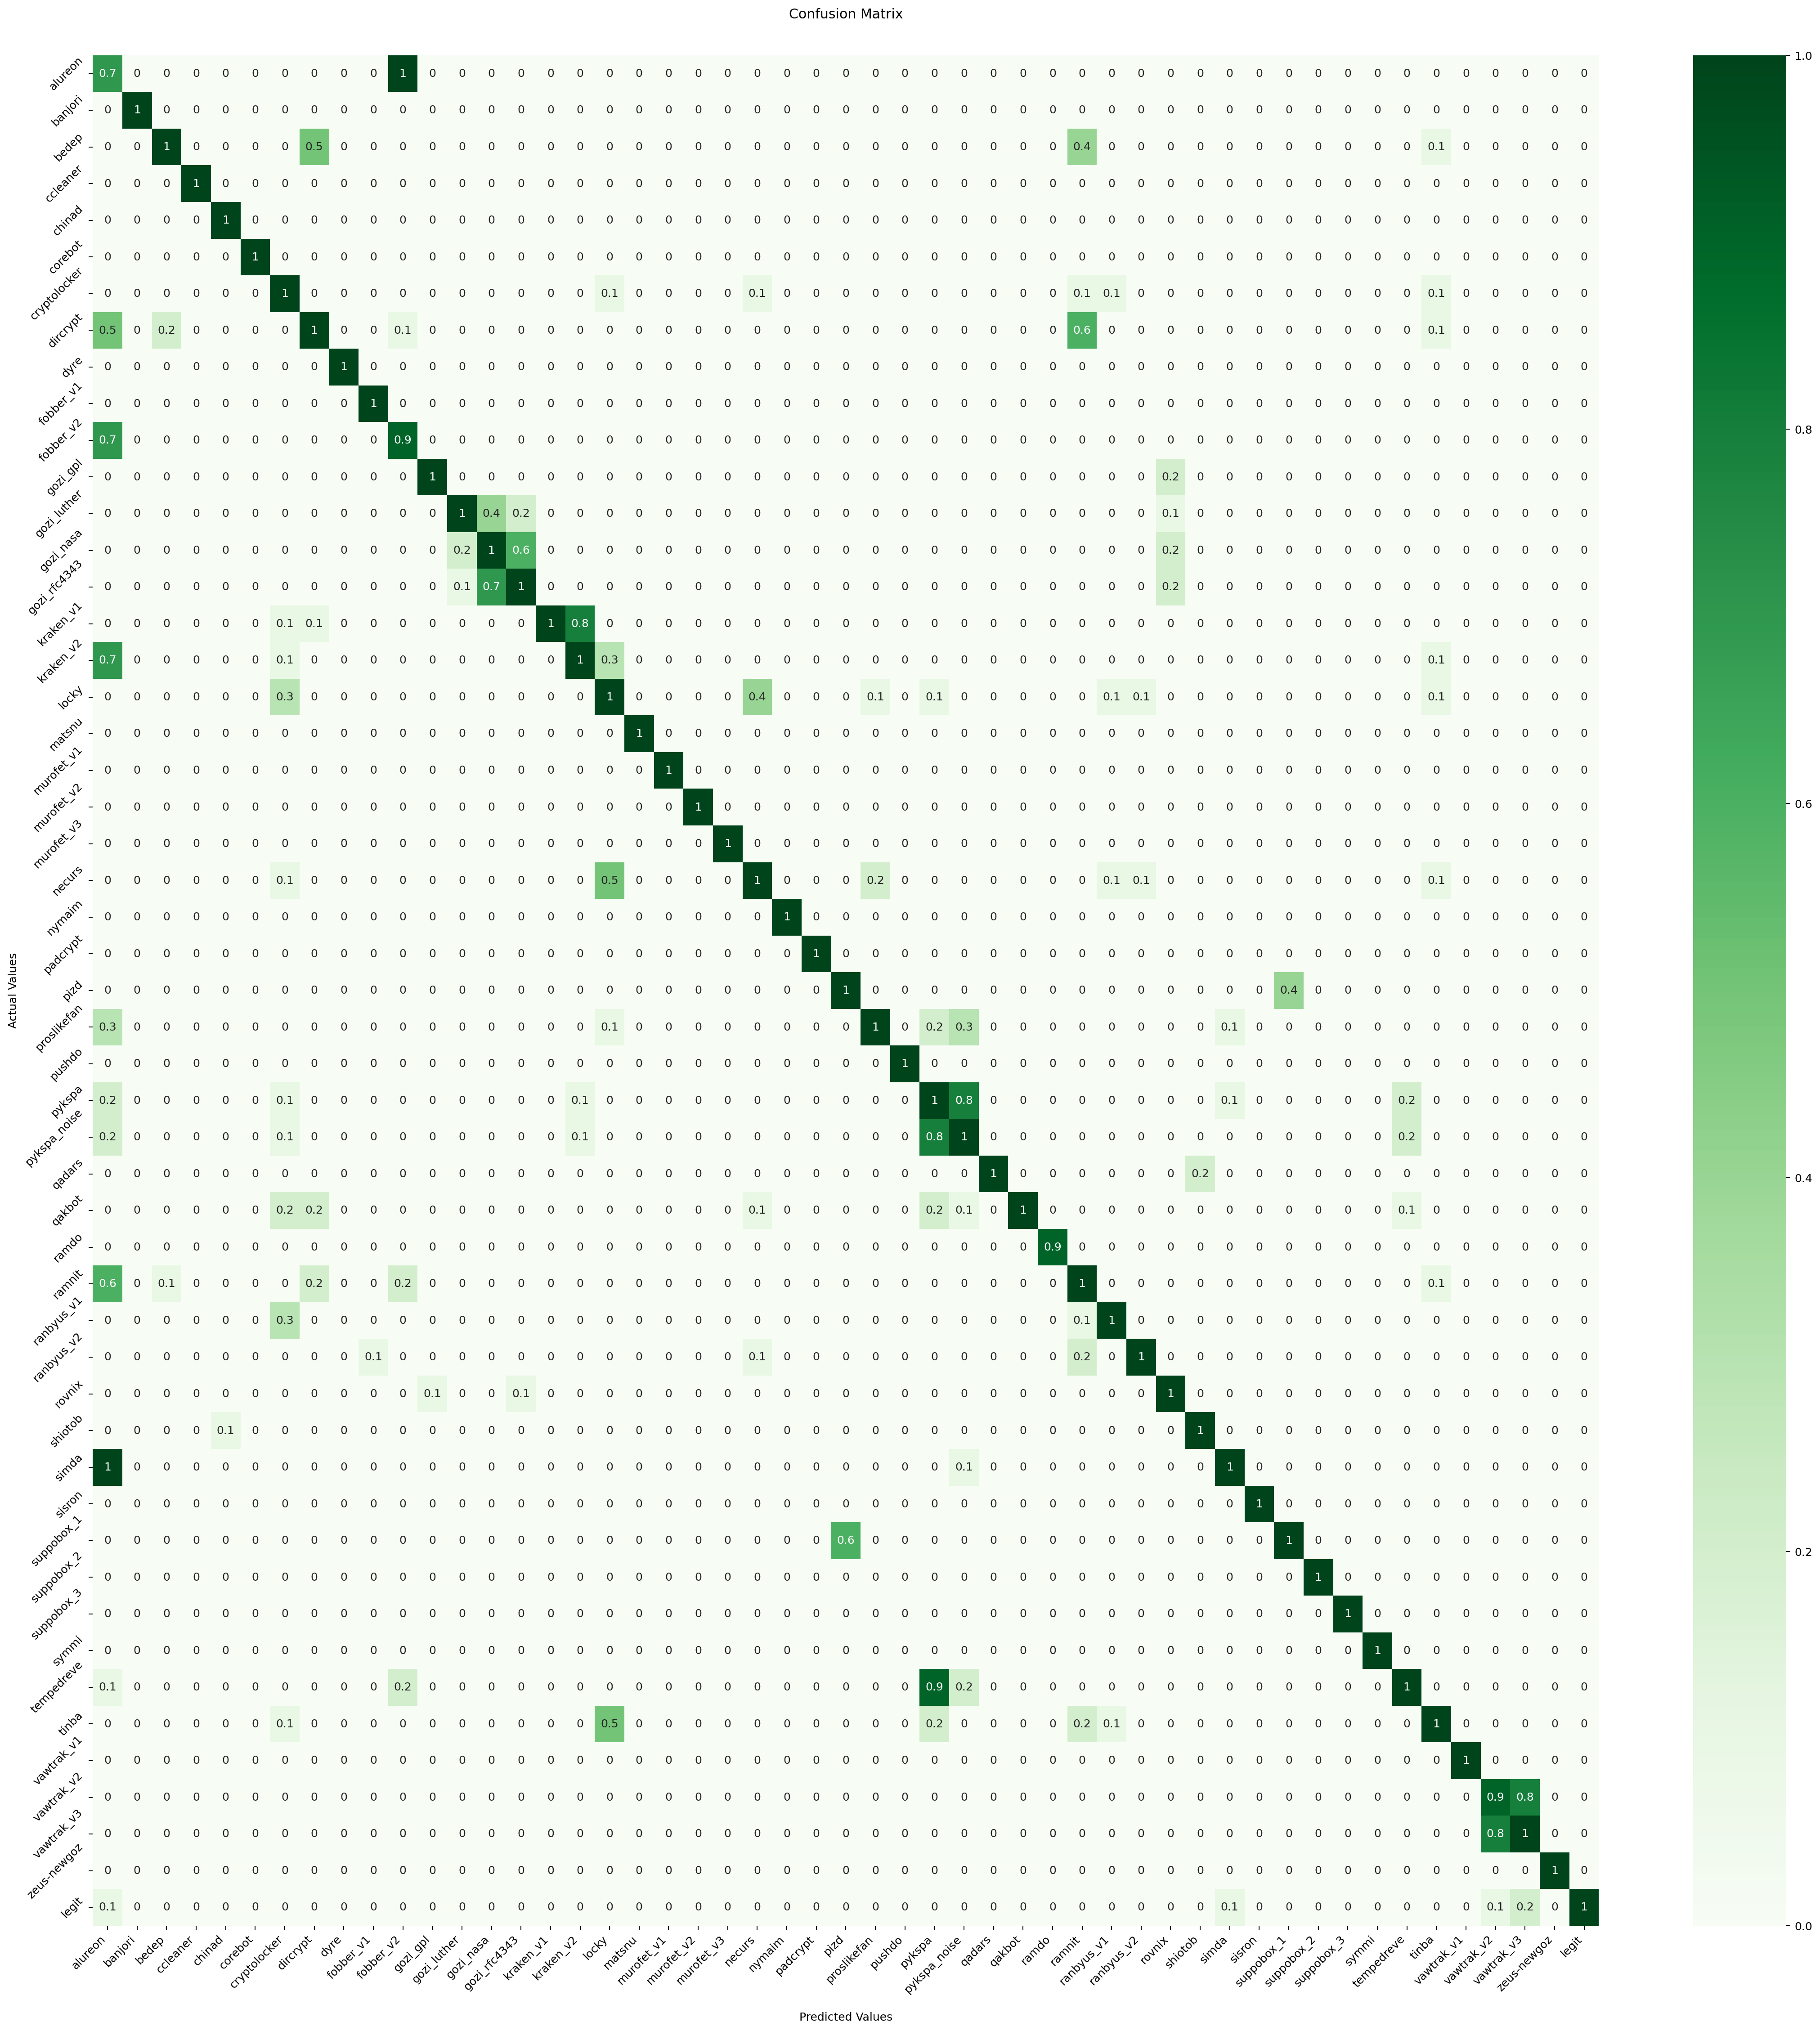

In [ ]:
get_confusion_matrix("/content/gdrive/MyDrive/ACS/reports/1k_0.1_efrp/confusion_matrices/EFRP_conf_matx_4.csv")